In [30]:
# Importing Libraries
import rasterio
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

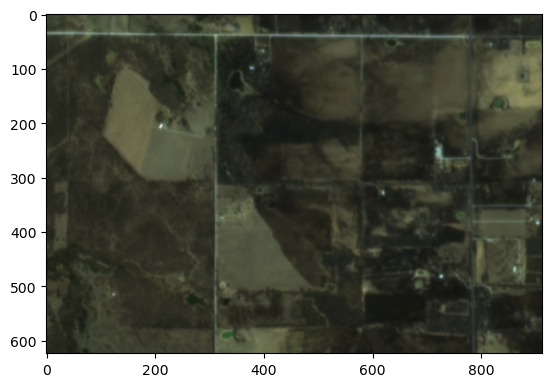

In [31]:
# Load the 8-band satellite image data
# filename = '../../../data/kidd-fire/t_3.tif'
filename = '../../../data/kidd-fire/t_2.tif'
# filename = '../../../data/kidd-fire/t_1.tif'

with rasterio.open(filename) as src:
    image = src.read()

# Select the desired bands
blue = image[1, :, :]
green = image[3, :, :]
red = image[5, :, :]

# Normalize the bands
blue = blue / blue.max()
green = green / green.max()
red = red / red.max()

# Combine the bands into an RGB image
rgb = np.stack([red, green, blue], axis=2)

# Display the RGB image
plt.imshow(rgb)
plt.show()

In [32]:
# Read the satellite image file into a numpy array
image = iio.imread(filename)
np.save('satellite_image.npy', image)

image_data = np.load('satellite_image.npy')
print(image_data.shape)

image_data_2d = image_data.reshape(-1, image_data.shape[-1] )
print(image_data_2d.shape)


(624, 913, 8)
(569712, 8)



## Calculating PCA


In [33]:
# Initialize the PCA model with 3 components
pca = PCA(n_components=3)

# Fit the model to the image data
pca.fit(image_data_2d)

# Transform the data into the PCA space
pca_results = pca.transform(image_data_2d)
pca_results.shape

(569712, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


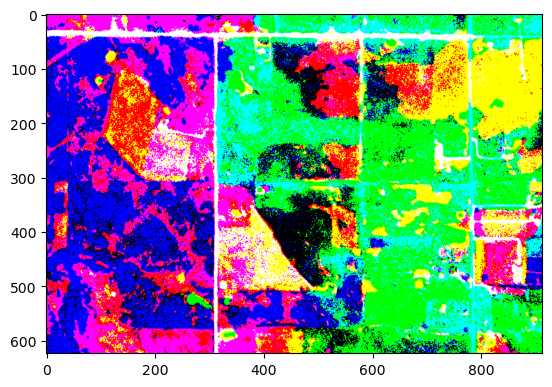

In [34]:
# Reshape the PCA results into a 2D image
pca_1 = pca_results[:, 0].reshape(image_data.shape[0], image_data.shape[1] )
pca_2 = pca_results[:, 1].reshape(image_data.shape[0], image_data.shape[1] )
pca_3 = pca_results[:, 2].reshape(image_data.shape[0], image_data.shape[1] )

# Combine the bands into an RGB image
pca_rgb = np.stack([pca_1, pca_2, pca_3], axis=2)

# Display the RGB image
plt.imshow(pca_rgb)
plt.show()


## Classifying the PCA Results Using K-means



(569712,)
(624, 913)


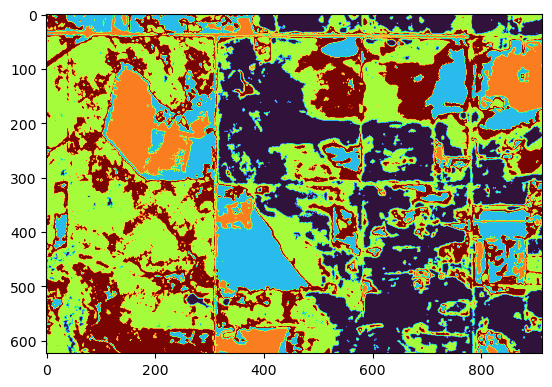

In [35]:
# # Define the number of clusters
n_clusters = 5

# Initialize the k-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')

# Fit the model to the data
kmeans.fit(pca_results)

# Predict the cluster assignments for each pixel
labels = kmeans.predict(pca_results)
print(labels.shape)
# Reshape the labels back into the original image shape
labels = labels.reshape(image_data.shape[0], image_data.shape[1])
print(labels.shape)

# Plot the image and display the results
plt.imshow(labels, cmap='turbo')
plt.show()